In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import warnings
warnings.simplefilter("ignore")

In [62]:
data = pd.read_csv("indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [63]:
# data.shape
data['Albumin_and_Globulin_Ratio'].mean()

np.float64(0.9470639032815197)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [65]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [66]:
data.Dataset.unique()

array([1, 2])

<Axes: xlabel='Dataset', ylabel='count'>

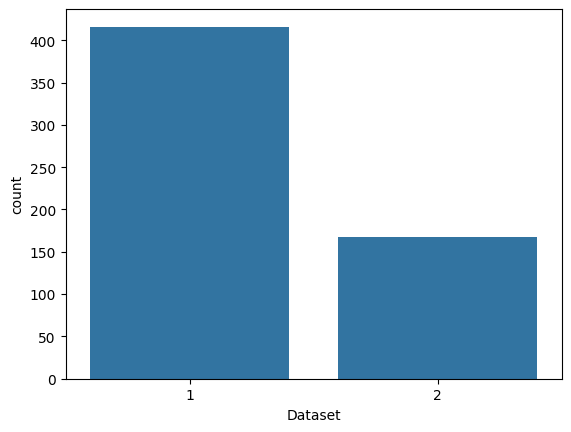

In [67]:
sns.countplot(x='Dataset',data=data)

**Here 1 means suffering from liver diseases and 2 means not suffering**

Replace 2 with 1 and 1 with 0.

0--> Suffering

1--> Not suffering

In [68]:
data['Dataset'] = data['Dataset'].replace([2,1],[1,0])
data['Dataset'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Dataset, dtype: int64

<Axes: xlabel='Dataset', ylabel='count'>

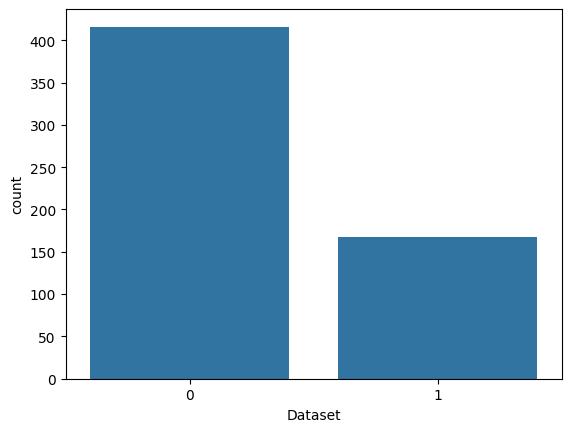

In [69]:
sns.countplot(x='Dataset',data=data)

Replacing the missing value with mean.

In [70]:
data['Albumin_and_Globulin_Ratio']= data['Albumin_and_Globulin_Ratio'].fillna(0.9470639032815201)  

In [71]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [72]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

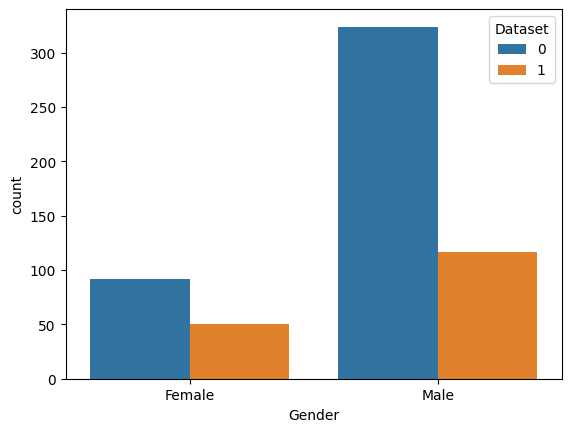

In [73]:
sns.countplot(x='Gender',data=data,hue='Dataset')

More males are suffering from liver diseases as compare to female.

Drop the *Gender* column and replace it with dummie column with with 1--> Male and 0-->Female

In [74]:
data = pd.get_dummies(data,columns=['Gender'],drop_first=True)

In [75]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,True


<Axes: >

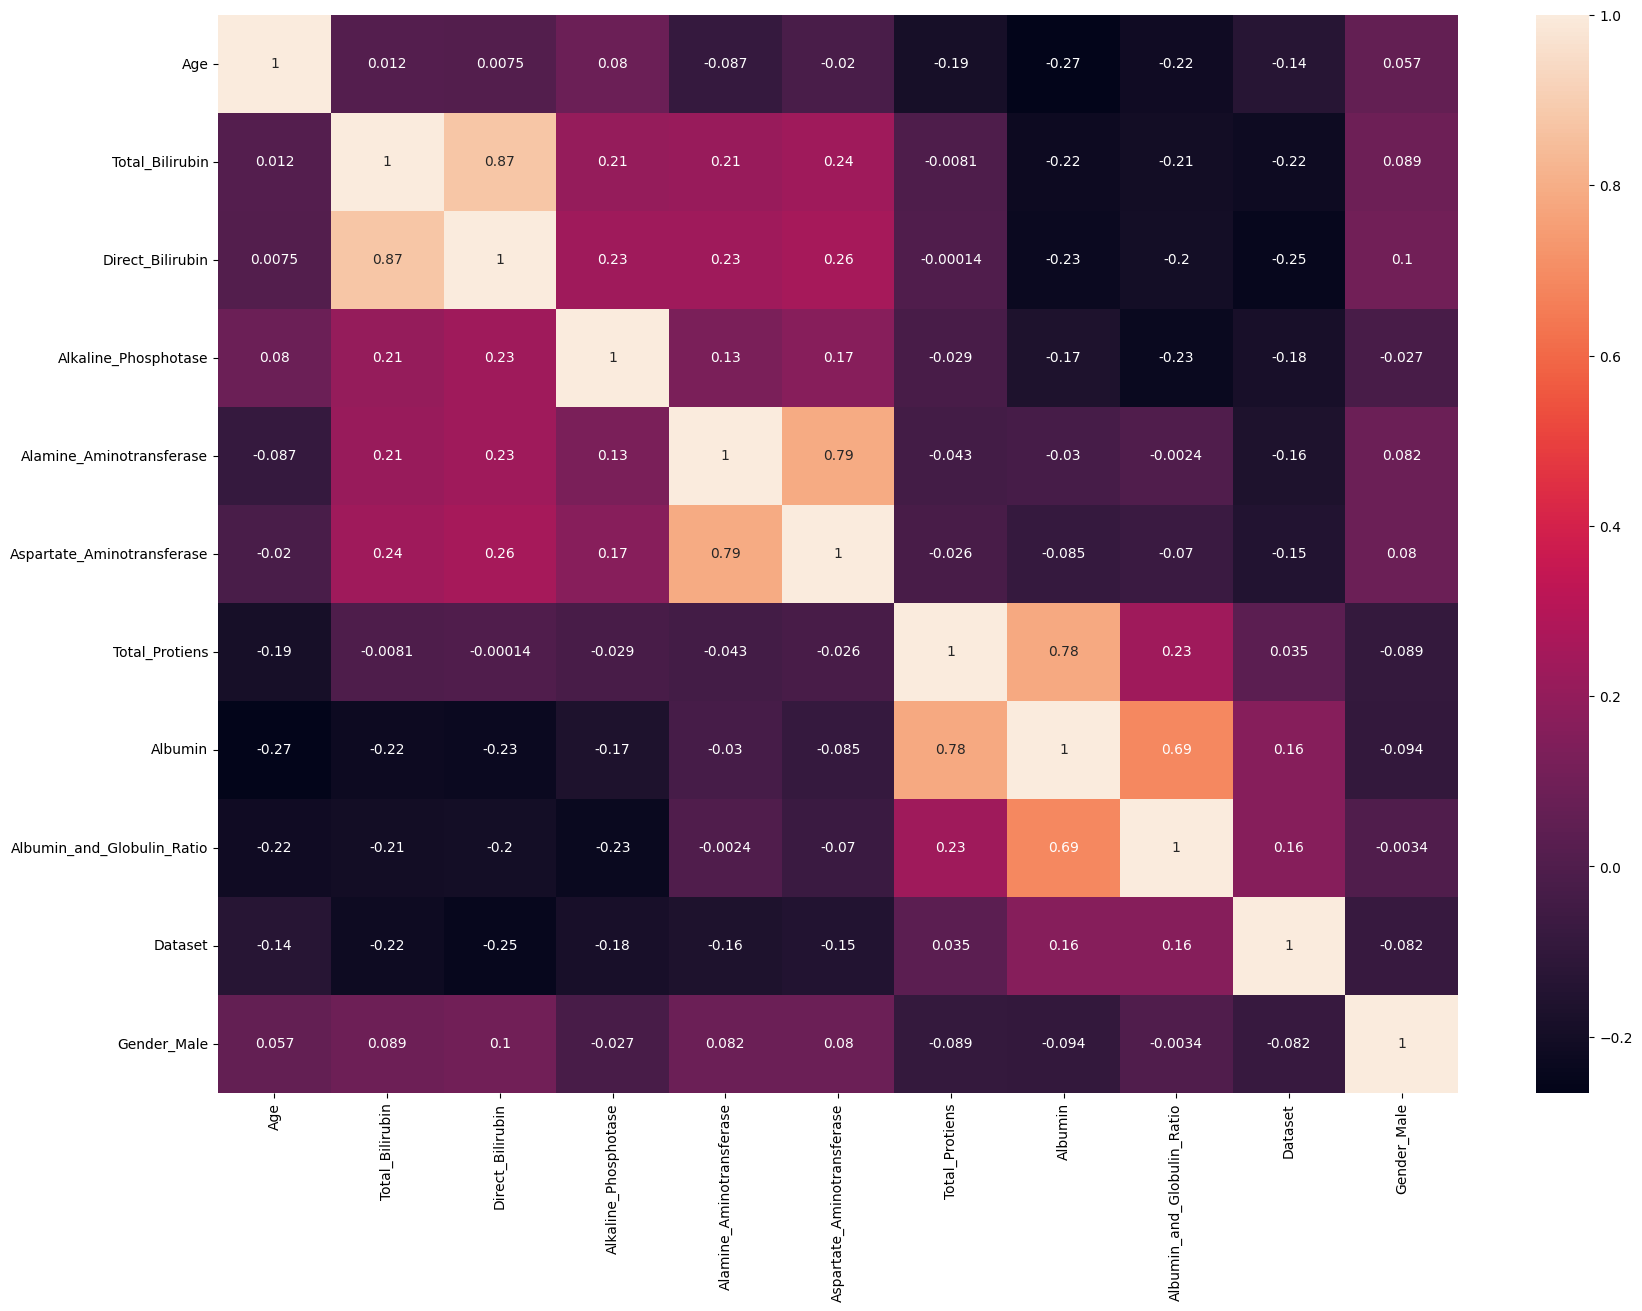

In [76]:
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(),annot=True)

In [77]:
# sns.pairplot(data,hue='Dataset')

In [78]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319,-0.003404
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000,-0.082416


In [79]:
X = data.drop("Dataset",axis=1)
y = data['Dataset']

In [80]:
print(X.shape)
print(y.shape)

(583, 10)
(583,)


In [81]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.1,random_state=42)

In [83]:
print("Train shape", X_train.shape," ",y_train.shape,"\n")
print("Test shape", X_test.shape," ",y_test.shape)

Train shape (524, 10)   (524,) 

Test shape (59, 10)   (59,)


In [84]:
# Adding first model
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Printing confusion metrics
confusion_matrix(y_test,model1.predict(X_test))

array([[42,  3],
       [ 7,  7]])

In [86]:
print(f"Accuracy is {round(accuracy_score(y_test, model1.predict(X_test))*100,2)}")

Accuracy is 83.05


In [87]:
from sklearn.model_selection import train_test_split as tts
from xgboost import XGBClassifier

# Split the data into training and test sets
X_train, X_temp, y_train, y_temp = tts(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = tts(X_temp, y_temp, test_size=0.5, random_state=42)  # Further split temp into validation and test sets

# Train the second model (XGBoost) with early stopping
model2 = XGBClassifier(n_estimators=1000, learning_rate=0.075, max_depth=3, early_stopping_rounds=10, verbose=False)
model2.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Evaluate the second model
print(f"XGBoost Accuracy: {round(accuracy_score(y_test, model2.predict(X_test)) * 100, 2)}")


[0]	validation_0-logloss:0.54895
[1]	validation_0-logloss:0.53417
[2]	validation_0-logloss:0.52093
[3]	validation_0-logloss:0.51008
[4]	validation_0-logloss:0.50209
[5]	validation_0-logloss:0.49674
[6]	validation_0-logloss:0.49210
[7]	validation_0-logloss:0.48701
[8]	validation_0-logloss:0.48108
[9]	validation_0-logloss:0.47686
[10]	validation_0-logloss:0.47262
[11]	validation_0-logloss:0.46954
[12]	validation_0-logloss:0.46537
[13]	validation_0-logloss:0.46038
[14]	validation_0-logloss:0.45841
[15]	validation_0-logloss:0.45576
[16]	validation_0-logloss:0.45374
[17]	validation_0-logloss:0.45221
[18]	validation_0-logloss:0.44964
[19]	validation_0-logloss:0.44695
[20]	validation_0-logloss:0.44412
[21]	validation_0-logloss:0.43653
[22]	validation_0-logloss:0.43568
[23]	validation_0-logloss:0.43110
[24]	validation_0-logloss:0.43067
[25]	validation_0-logloss:0.42850
[26]	validation_0-logloss:0.42778
[27]	validation_0-logloss:0.42446
[28]	validation_0-logloss:0.42416
[29]	validation_0-loglos

In [88]:
# Printing accuracy score
confusion_matrix(y_test,model1.predict(X_test))
print(f"Accuracy is {round(accuracy_score(y_test, model2.predict(X_test))*100,2)}")

Accuracy is 73.33


### From the 2 models we can see that model1 have more accuracy as compare to model2. So we will prefer model1.

In [89]:
pickle.dump(model1,open("liver.pkl",'wb'))